In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
#für tödliche Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
y = df['UKATEGORIE'].isin([1, 2]).astype(int)





Description: The minimum number of samples required to split an internal node.
Impact: Higher values prevent the model from learning overly specific patterns (overfitting).
Typical Range: Values like 2, 5, 10.

In [2]:
# erstmal alle Parameter einzeln mit class weight 9 und fbeta mit beta = 2
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)
class_weight_optimiert = {0:1, 1: 9}


max_index = 0
max_score = 0
number_trees = []
results = []



for i in range (330, 380):
    rf_clas = RandomForestClassifier(min_samples_split=i, random_state=42, class_weight=class_weight_optimiert)
    result_fbeta = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    if result_fbeta.mean() > max_score: 
        max_index = i
        max_score = result_fbeta.mean()
        print(f"bester score bei min_samples_split = {i}")
    number_trees.append(i)
    results.append(result_fbeta.mean())
    print(f"Fbeta-score mit min_samples_split = {i}:", result_fbeta.mean())





bester score bei min_samples_split = 330
Fbeta-score mit min_samples_split = 330: 0.5069463123088472
Fbeta-score mit min_samples_split = 331: 0.5060692280394832
bester score bei min_samples_split = 332
Fbeta-score mit min_samples_split = 332: 0.507294996195711
Fbeta-score mit min_samples_split = 333: 0.5070434673716634
bester score bei min_samples_split = 334
Fbeta-score mit min_samples_split = 334: 0.5076550984527325
bester score bei min_samples_split = 335
Fbeta-score mit min_samples_split = 335: 0.5078496979577951
Fbeta-score mit min_samples_split = 336: 0.507205297939452
Fbeta-score mit min_samples_split = 337: 0.5072789366480247
Fbeta-score mit min_samples_split = 338: 0.5076277566500089
Fbeta-score mit min_samples_split = 339: 0.5073650992411617
Fbeta-score mit min_samples_split = 340: 0.5067380732831415
Fbeta-score mit min_samples_split = 341: 0.5066037070983307
Fbeta-score mit min_samples_split = 342: 0.5063336026920983
Fbeta-score mit min_samples_split = 343: 0.506756388463173

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


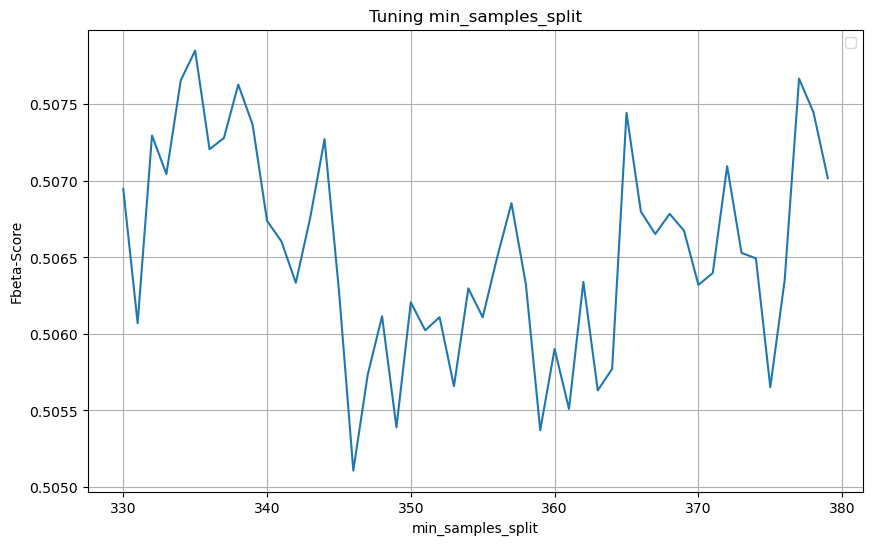

In [3]:
from matplotlib import pyplot as plt

# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(number_trees, results)

plt.title('Tuning min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()